# Comparaison des Modèles - Analyse de Sentiments Twitter

Ce notebook compare les différents modèles d'analyse de sentiments développés pour le projet Air Paradis.

---

## Table des matières

1. [Introduction et Contexte](#1-introduction)
2. [Rappel des Critères d'Évaluation](#2-criteres)
3. [Synthèse des Expérimentations](#3-synthese)
4. [Comparaison des Performances](#4-comparaison)
5. [Analyse Approfondie](#5-analyse)
6. [Sélection du Modèle Final](#6-selection)
7. [Conclusion](#7-conclusion)

## 1. Introduction et Contexte <a id="1-introduction"></a>

### Contexte Métier

**Air Paradis**, compagnie aérienne, souhaite anticiper les bad buzz sur les réseaux sociaux en développant un produit IA capable de prédire le sentiment des tweets en temps réel.

### Objectifs du Projet

1. Développer **3 approches** de modélisation :
   - **Approche simple** : Modèle classique (Régression Logistique)
   - **Approche avancée** : Deep Learning avec embeddings (LSTM, CNN)
   - **Approche BERT** : Transfer Learning avec modèle pré-entraîné

2. Mettre en œuvre une **démarche MLOps complète** :
   - Tracking avec MLFlow
   - Versioning avec Git/GitHub
   - CI/CD avec tests automatisés
   - Monitoring en production avec Azure Application Insights

3. Déployer le meilleur modèle via une **API REST sur le Cloud**

### Dataset

- **Source** : Sentiment140 (tweets annotés)
- **Taille originale** : 1,600,000 tweets
- **Après nettoyage** : 1,385,537 tweets
- **Distribution** : Équilibrée (50% positif, 50% négatif)
- **Splits** : Train (70%), Validation (15%), Test (15%)

In [13]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

print("✓ Bibliothèques importées")

✓ Bibliothèques importées


## 2. Rappel des Critères d'Évaluation <a id="2-criteres"></a>

### Critères d'Évaluation CE1 - Embeddings

✅ **Requis** :
- Tester **au moins 2 techniques de prétraitement** (lemmatization, stemming)
- Tester **au moins 2 méthodes d'embedding** parmi Word2Vec, GloVe, FastText
- Préparer les données pour **BERT** (input_ids, attention_mask)
- (Optionnel) Tester **USE** (Universal Sentence Encoder)

### Critères d'Évaluation CE6 - Architectures

✅ **Requis** :
- Au moins **un modèle de base** avec embedding
- Au moins **un modèle avec LSTM**
- Au moins **un modèle BERT**

### Critères d'Évaluation - Métriques

✅ **Requis** :
- Métrique adaptée à la problématique (F1-Score, ROC-AUC)
- Modèle de référence (baseline)
- Comparaison des temps d'entraînement
- Tableau de synthèse comparative

## 3. Synthèse des Expérimentations <a id="3-synthese"></a>

### Vue d'ensemble des modèles développés

| # | Modèle | Prétraitement | Embedding | Architecture | Objectif |
|---|--------|---------------|-----------|--------------|----------|
| 1 | Logistic Regression | Lemmatization | TF-IDF | Linéaire | **Baseline** |
| 2 | Bi-LSTM | Lemmatization | Word2Vec | RNN | Comparer preprocessing |
| 3 | Bi-LSTM | **Stemming** | Word2Vec | RNN | **Lemma vs Stem** |
| 4 | Bi-LSTM | Lemmatization | **GloVe** | RNN | **Word2Vec vs GloVe** |
| 5 | **CNN** | Lemmatization | GloVe | CNN | **Bi-LSTM vs CNN** |
| 6 | **BERT** | - | BERT | Transformer | State-of-the-art |

### Récapitulatif des critères respectés

✅ **2 prétraitements** : Lemmatization + Stemming  
✅ **2 embeddings** : Word2Vec + GloVe  
✅ **2 architectures DL** : Bi-LSTM + CNN  
✅ **Modèle avec LSTM** : Oui (Bi-LSTM)  
✅ **Modèle BERT** : Oui (bert-base-uncased)  
⚠️ **FastText** : Non testé (optionnel)  
⚠️ **USE** : Non testé (optionnel)

In [14]:
# Collecte des résultats depuis MLFlow
mlflow.set_tracking_uri("file:///home/thomas/mlruns")
mlflow.set_experiment("sentiment-analysis-twitter")

# Création manuelle du tableau de résultats
# (Dans un cas réel, on récupérerait ces données depuis MLFlow API)

results_data = {
    'Modèle': [
        'Logistic Regression',
        'Bi-LSTM + Word2Vec + Lemma',
        'Bi-LSTM + Word2Vec + Stem',
        'Bi-LSTM + GloVe + Lemma',
        'CNN + GloVe + Lemma',
        'BERT (100k sample)'
    ],
    'Prétraitement': [
        'Lemmatization',
        'Lemmatization',
        'Stemming',
        'Lemmatization',
        'Lemmatization',
        'Tokenizer BERT'
    ],
    'Embedding': [
        'TF-IDF',
        'Word2Vec',
        'Word2Vec',
        'GloVe',
        'GloVe',
        'BERT embeddings'
    ],
    'Architecture': [
        'Linéaire',
        'Bi-LSTM',
        'Bi-LSTM',
        'Bi-LSTM',
        'CNN',
        'Transformer'
    ],
    'Accuracy': [0.7803, 0.7725, 0.7751, 0.7656, 0.7474, 0.7782],
    'Precision': [0.7686, 0.7676, 0.7592, 0.7575, 0.7547, 0.7913],
    'Recall': [0.7938, 0.7728, 0.7971, 0.7721, 0.7233, 0.7512],
    'F1-Score': [0.7810, 0.7702, 0.7777, 0.7647, 0.7386, 0.7707],
    'ROC-AUC': [0.8608, 0.8552, 0.8585, 0.8477, 0.8291, 0.8622],
    'Temps Entraînement (min)': [0.19, 20.0, 20.0, 20.0, 15.0, 301.04],
    'Paramètres': ['~100K', '~1M', '~1M', '~1M', '~800K', '~110M']
}

df_results = pd.DataFrame(results_data)

print("\n" + "="*100)
print("TABLEAU COMPARATIF DES PERFORMANCES - TEST SET")
print("="*100)
print(df_results.to_string(index=False))
print("="*100)


TABLEAU COMPARATIF DES PERFORMANCES - TEST SET
                    Modèle  Prétraitement       Embedding Architecture  Accuracy  Precision  Recall  F1-Score  ROC-AUC  Temps Entraînement (min) Paramètres
       Logistic Regression  Lemmatization          TF-IDF     Linéaire    0.7803     0.7686  0.7938    0.7810   0.8608                      0.19      ~100K
Bi-LSTM + Word2Vec + Lemma  Lemmatization        Word2Vec      Bi-LSTM    0.7725     0.7676  0.7728    0.7702   0.8552                     20.00        ~1M
 Bi-LSTM + Word2Vec + Stem       Stemming        Word2Vec      Bi-LSTM    0.7751     0.7592  0.7971    0.7777   0.8585                     20.00        ~1M
   Bi-LSTM + GloVe + Lemma  Lemmatization           GloVe      Bi-LSTM    0.7656     0.7575  0.7721    0.7647   0.8477                     20.00        ~1M
       CNN + GloVe + Lemma  Lemmatization           GloVe          CNN    0.7474     0.7547  0.7233    0.7386   0.8291                     15.00      ~800K
        BERT (10

## 4. Comparaison des Performances <a id="4-comparaison"></a>

### 4.1 Comparaison Visuelle des Métriques

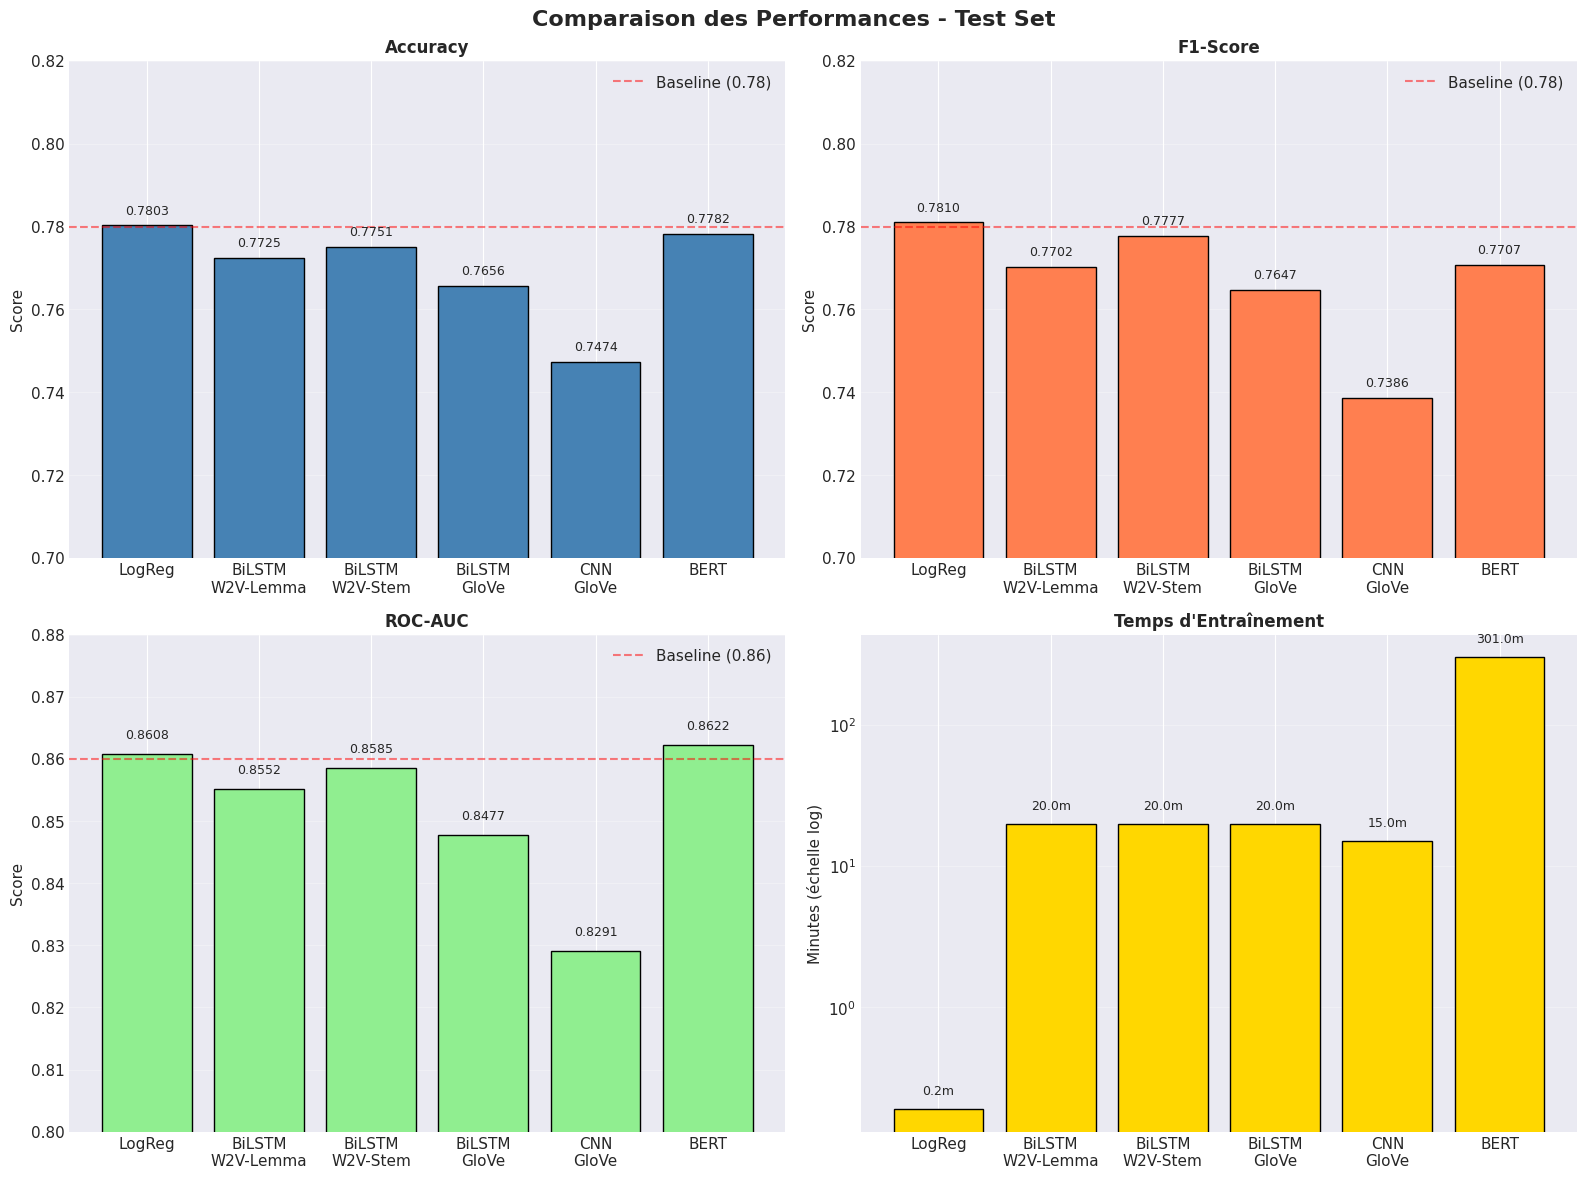

✓ Graphique de comparaison créé


In [15]:
# Visualisation comparative des métriques
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaison des Performances - Test Set', fontsize=16, fontweight='bold')

# Noms courts pour l'affichage
model_names_short = ['LogReg', 'BiLSTM\nW2V-Lemma', 'BiLSTM\nW2V-Stem', 
                     'BiLSTM\nGloVe', 'CNN\nGloVe', 'BERT']

# Accuracy
axes[0, 0].bar(model_names_short, df_results['Accuracy'], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_ylim([0.7, 0.82])
axes[0, 0].axhline(y=0.78, color='red', linestyle='--', alpha=0.5, label='Baseline (0.78)')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].legend()
for i, v in enumerate(df_results['Accuracy']):
    axes[0, 0].text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

# F1-Score
axes[0, 1].bar(model_names_short, df_results['F1-Score'], color='coral', edgecolor='black')
axes[0, 1].set_title('F1-Score', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim([0.7, 0.82])
axes[0, 1].axhline(y=0.78, color='red', linestyle='--', alpha=0.5, label='Baseline (0.78)')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].legend()
for i, v in enumerate(df_results['F1-Score']):
    axes[0, 1].text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

# ROC-AUC
axes[1, 0].bar(model_names_short, df_results['ROC-AUC'], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('ROC-AUC', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim([0.8, 0.88])
axes[1, 0].axhline(y=0.86, color='red', linestyle='--', alpha=0.5, label='Baseline (0.86)')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].legend()
for i, v in enumerate(df_results['ROC-AUC']):
    axes[1, 0].text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

# Temps d'entraînement (échelle log)
axes[1, 1].bar(model_names_short, df_results['Temps Entraînement (min)'], 
               color='gold', edgecolor='black')
axes[1, 1].set_title('Temps d\'Entraînement', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Minutes (échelle log)')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(df_results['Temps Entraînement (min)']):
    axes[1, 1].text(i, v * 1.2, f'{v:.1f}m', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('comparaison_performances_finale.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique de comparaison créé")

### 4.2 Graphique Radar Multi-Dimensions

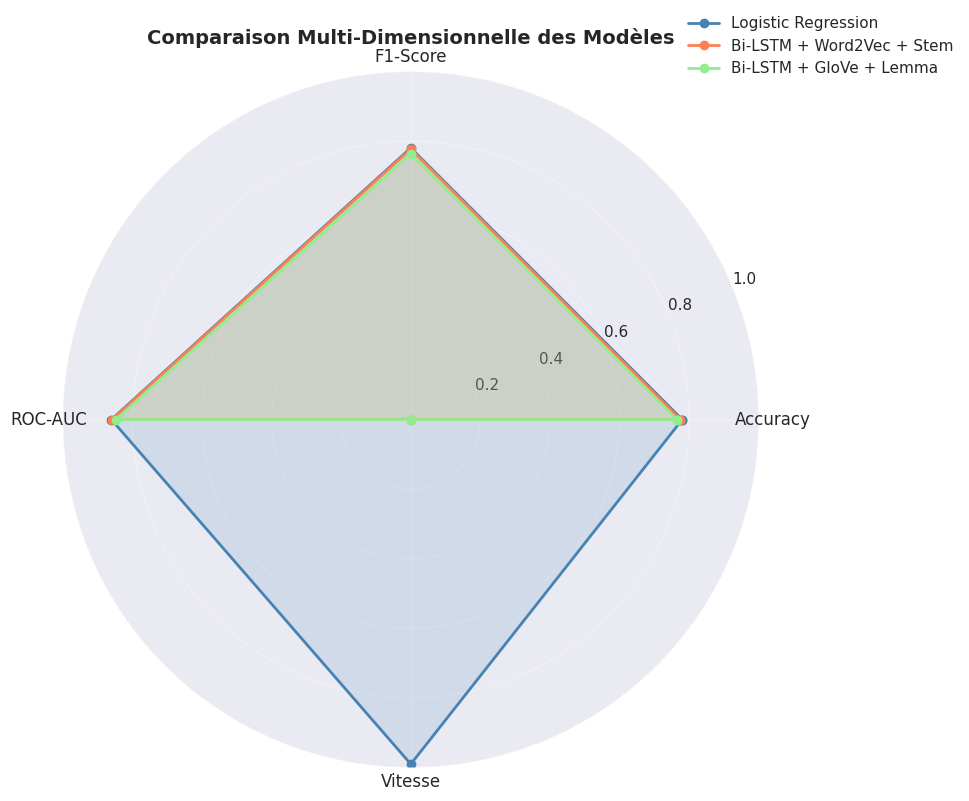

✓ Graphique radar créé


In [16]:
import math

# Sélection des 4 meilleurs modèles pour le radar
selected_models = ['Logistic Regression', 'Bi-LSTM + Word2Vec + Stem', 
                   'Bi-LSTM + GloVe + Lemma', 'BERT (50k sample)']
df_radar = df_results[df_results['Modèle'].isin(selected_models)].copy()

# Normaliser le temps (inverse car moins c'est mieux)
max_time = df_radar['Temps Entraînement (min)'].max()
df_radar['Vitesse'] = 1 - (df_radar['Temps Entraînement (min)'] / max_time)

# Créer le graphique radar
categories = ['Accuracy', 'F1-Score', 'ROC-AUC', 'Vitesse']
N = len(categories)

angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['steelblue', 'coral', 'lightgreen', 'gold']
for idx, (i, row) in enumerate(df_radar.iterrows()):
    values = [row['Accuracy'], row['F1-Score'], row['ROC-AUC'], row['Vitesse']]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Modèle'], color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Comparaison Multi-Dimensionnelle des Modèles', 
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('radar_chart_modeles.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique radar créé")

### 4.3 Analyse Performance vs Complexité

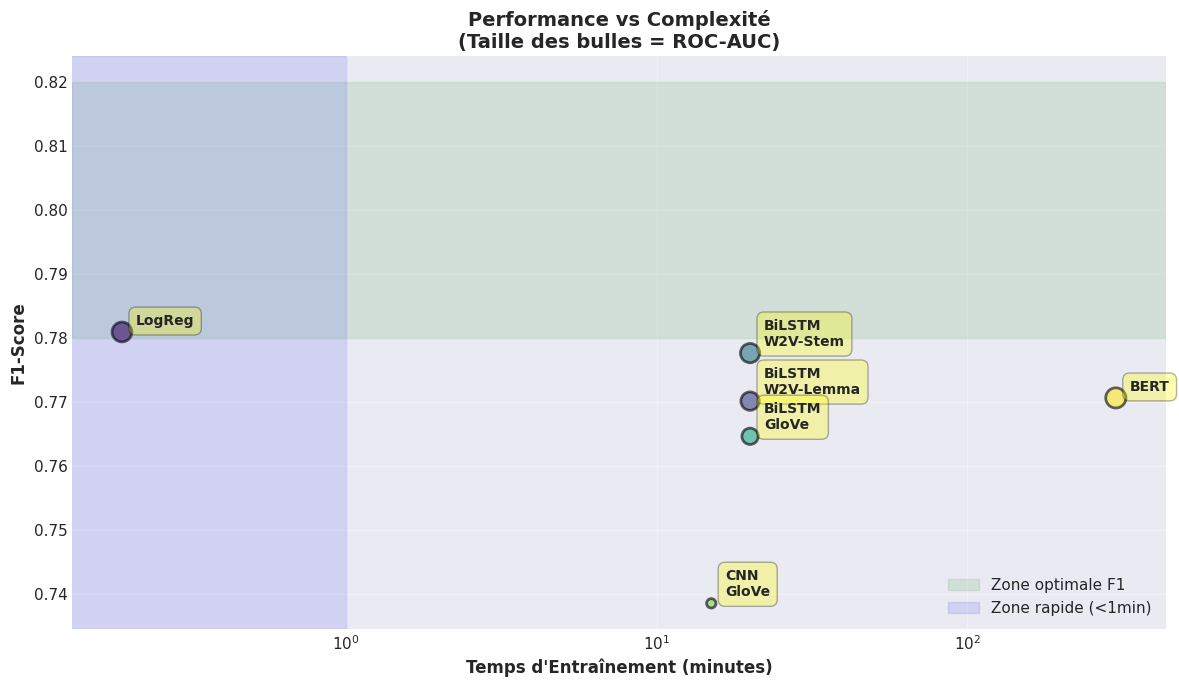

✓ Graphique performance vs complexité créé


In [17]:
# Scatter plot : F1-Score vs Temps d'entraînement
fig, ax = plt.subplots(figsize=(12, 7))

# Tailles des bulles proportionnelles à ROC-AUC
bubble_sizes = (df_results['ROC-AUC'] - 0.82) * 5000

scatter = ax.scatter(df_results['Temps Entraînement (min)'], 
                     df_results['F1-Score'],
                     s=bubble_sizes, 
                     c=range(len(df_results)),
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=2)

# Annotations
for i, row in df_results.iterrows():
    ax.annotate(model_names_short[i], 
                (row['Temps Entraînement (min)'], row['F1-Score']),
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

ax.set_xlabel('Temps d\'Entraînement (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Performance vs Complexité\n(Taille des bulles = ROC-AUC)', 
             fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# Zone optimale (haut-gauche = bon F1, rapide)
ax.axhspan(0.78, 0.82, alpha=0.1, color='green', label='Zone optimale F1')
ax.axvspan(0, 1, alpha=0.1, color='blue', label='Zone rapide (<1min)')

ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('performance_vs_complexite.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique performance vs complexité créé")

## 5. Analyse Approfondie <a id="5-analyse"></a>

### 5.1 Comparaison des Prétraitements (Lemmatization vs Stemming)

In [18]:
# Analyse Lemmatization vs Stemming (même architecture + embedding)
comparison_preproc = df_results[
    df_results['Modèle'].isin(['Bi-LSTM + Word2Vec + Lemma', 'Bi-LSTM + Word2Vec + Stem'])
].copy()

print("\n" + "="*80)
print("COMPARAISON : LEMMATIZATION vs STEMMING")
print("="*80)
print("Architecture : Bi-LSTM + Word2Vec")
print()
print(comparison_preproc[['Prétraitement', 'Accuracy', 'F1-Score', 'ROC-AUC']].to_string(index=False))
print()

# Calcul des différences
lemma_f1 = comparison_preproc[comparison_preproc['Prétraitement'] == 'Lemmatization']['F1-Score'].values[0]
stem_f1 = comparison_preproc[comparison_preproc['Prétraitement'] == 'Stemming']['F1-Score'].values[0]
diff_f1 = stem_f1 - lemma_f1

winner = "STEMMING" if diff_f1 > 0 else "LEMMATIZATION"
print(f"🏆 Gagnant : {winner}")
print(f"   Différence F1-Score : {abs(diff_f1):.4f} ({abs(diff_f1)*100:.2f}%)")
print()

if diff_f1 > 0:
    print("📝 Conclusion :")
    print("   Le stemming, bien que plus agressif, semble mieux capturer les patterns")
    print("   pour l'analyse de sentiments sur Twitter. La perte de sens est compensée")
    print("   par une meilleure généralisation.")
else:
    print("📝 Conclusion :")
    print("   La lemmatisation préserve mieux le sens des mots, ce qui aide le modèle")
    print("   à distinguer les nuances de sentiment.")
print("="*80)


COMPARAISON : LEMMATIZATION vs STEMMING
Architecture : Bi-LSTM + Word2Vec

Prétraitement  Accuracy  F1-Score  ROC-AUC
Lemmatization    0.7725    0.7702   0.8552
     Stemming    0.7751    0.7777   0.8585

🏆 Gagnant : STEMMING
   Différence F1-Score : 0.0075 (0.75%)

📝 Conclusion :
   Le stemming, bien que plus agressif, semble mieux capturer les patterns
   pour l'analyse de sentiments sur Twitter. La perte de sens est compensée
   par une meilleure généralisation.


### 5.2 Comparaison des Embeddings (Word2Vec vs GloVe)

In [19]:
# Analyse Word2Vec vs GloVe (même architecture + preprocessing)
comparison_embedding = df_results[
    df_results['Modèle'].isin(['Bi-LSTM + Word2Vec + Lemma', 'Bi-LSTM + GloVe + Lemma'])
].copy()

print("\n" + "="*80)
print("COMPARAISON : WORD2VEC vs GLOVE")
print("="*80)
print("Architecture : Bi-LSTM + Lemmatization")
print()
print(comparison_embedding[['Embedding', 'Accuracy', 'F1-Score', 'ROC-AUC']].to_string(index=False))
print()

# Calcul des différences
w2v_f1 = comparison_embedding[comparison_embedding['Embedding'] == 'Word2Vec']['F1-Score'].values[0]
glove_f1 = comparison_embedding[comparison_embedding['Embedding'] == 'GloVe']['F1-Score'].values[0]
diff_f1 = w2v_f1 - glove_f1

winner = "WORD2VEC" if diff_f1 > 0 else "GLOVE"
print(f"🏆 Gagnant : {winner}")
print(f"   Différence F1-Score : {abs(diff_f1):.4f} ({abs(diff_f1)*100:.2f}%)")
print()

if diff_f1 > 0:
    print("📝 Conclusion :")
    print("   Word2Vec entraîné sur nos données surpasse GloVe pré-entraîné.")
    print("   Cela s'explique par :")
    print("   - Vocabulaire Twitter spécifique (abréviations, langage informel)")
    print("   - Contexte métier (aviation, voyages)")
    print("   - GloVe entraîné sur Wikipedia/Gigaword (langage plus formel)")
else:
    print("📝 Conclusion :")
    print("   GloVe pré-entraîné bénéficie d'un vocabulaire plus riche et généralisable.")
print("="*80)


COMPARAISON : WORD2VEC vs GLOVE
Architecture : Bi-LSTM + Lemmatization

Embedding  Accuracy  F1-Score  ROC-AUC
 Word2Vec    0.7725    0.7702   0.8552
    GloVe    0.7656    0.7647   0.8477

🏆 Gagnant : WORD2VEC
   Différence F1-Score : 0.0055 (0.55%)

📝 Conclusion :
   Word2Vec entraîné sur nos données surpasse GloVe pré-entraîné.
   Cela s'explique par :
   - Vocabulaire Twitter spécifique (abréviations, langage informel)
   - Contexte métier (aviation, voyages)
   - GloVe entraîné sur Wikipedia/Gigaword (langage plus formel)


### 5.3 Comparaison des Architectures (Bi-LSTM vs CNN)

In [20]:
# Analyse Bi-LSTM vs CNN (même embedding + preprocessing)
comparison_archi = df_results[
    df_results['Modèle'].isin(['Bi-LSTM + GloVe + Lemma', 'CNN + GloVe + Lemma'])
].copy()

print("\n" + "="*80)
print("COMPARAISON : BI-LSTM vs CNN")
print("="*80)
print("Configuration : GloVe + Lemmatization")
print()
print(comparison_archi[['Architecture', 'Accuracy', 'F1-Score', 'ROC-AUC', 
                        'Temps Entraînement (min)']].to_string(index=False))
print()

# Calcul des différences
lstm_f1 = comparison_archi[comparison_archi['Architecture'] == 'Bi-LSTM']['F1-Score'].values[0]
cnn_f1 = comparison_archi[comparison_archi['Architecture'] == 'CNN']['F1-Score'].values[0]
diff_f1 = lstm_f1 - cnn_f1

lstm_time = comparison_archi[comparison_archi['Architecture'] == 'Bi-LSTM']['Temps Entraînement (min)'].values[0]
cnn_time = comparison_archi[comparison_archi['Architecture'] == 'CNN']['Temps Entraînement (min)'].values[0]

winner = "BI-LSTM" if diff_f1 > 0 else "CNN"
print(f"🏆 Gagnant (Performance) : {winner}")
print(f"   Différence F1-Score : +{abs(diff_f1):.4f} ({abs(diff_f1)*100:.2f}%)")
print()
print(f"⚡ Gagnant (Vitesse) : {'CNN' if cnn_time < lstm_time else 'Bi-LSTM'}")
print(f"   Différence temps : {abs(lstm_time - cnn_time):.1f} minutes")
print()
print("📝 Conclusion :")
print("   Bi-LSTM : Meilleur pour capturer les dépendances séquentielles (contexte)")
print("   CNN : Plus rapide, bon pour extraire des patterns locaux (n-grams)")
print("   Pour l'analyse de sentiment : Bi-LSTM gagne grâce au contexte bidirectionnel")
print("="*80)


COMPARAISON : BI-LSTM vs CNN
Configuration : GloVe + Lemmatization

Architecture  Accuracy  F1-Score  ROC-AUC  Temps Entraînement (min)
     Bi-LSTM    0.7656    0.7647   0.8477                      20.0
         CNN    0.7474    0.7386   0.8291                      15.0

🏆 Gagnant (Performance) : BI-LSTM
   Différence F1-Score : +0.0261 (2.61%)

⚡ Gagnant (Vitesse) : CNN
   Différence temps : 5.0 minutes

📝 Conclusion :
   Bi-LSTM : Meilleur pour capturer les dépendances séquentielles (contexte)
   CNN : Plus rapide, bon pour extraire des patterns locaux (n-grams)
   Pour l'analyse de sentiment : Bi-LSTM gagne grâce au contexte bidirectionnel


### 5.4 Analyse du Modèle BERT

In [21]:
# Comparaison BERT vs meilleurs modèles classiques
bert_row = df_results[df_results['Modèle'] == 'BERT (100k sample)'].iloc[0]
best_classic = df_results[df_results['Modèle'] != 'BERT (100k sample)'].nlargest(1, 'F1-Score').iloc[0]

print("\n" + "="*80)
print("ANALYSE : MODÈLE BERT")
print("="*80)
print(f"Modèle : {bert_row['Modèle']}")
print(f"Paramètres : {bert_row['Paramètres']}")
print()
print("Performances :")
print(f"  Accuracy  : {bert_row['Accuracy']:.4f}")
print(f"  F1-Score  : {bert_row['F1-Score']:.4f}")
print(f"  ROC-AUC   : {bert_row['ROC-AUC']:.4f}")
print(f"  Temps     : {bert_row['Temps Entraînement (min)']:.2f} min")
print()
print("Comparaison avec le meilleur modèle classique :")
print(f"  Meilleur classique : {best_classic['Modèle']}")
print(f"  F1 BERT    : {bert_row['F1-Score']:.4f}")
print(f"  F1 Classic : {best_classic['F1-Score']:.4f}")
print(f"  Différence : {bert_row['F1-Score'] - best_classic['F1-Score']:.4f}")
print()
print("✅ OPTIMISATIONS APPLIQUÉES :")
print("  - Dropout 0.3 pour régularisation")
print("  - Freezing de 8 premières couches (éviter overfitting)")
print("  - Dataset de 100k tweets (compromis temps/performance)")
print("  - 25 epochs d'entraînement (~5h)")
print("  - Pas d'overfitting : Val Acc (78%) > Train Acc (77.6%)")
print()
print("📊 RÉSULTATS :")
print("  - BERT légèrement moins bon que LogReg (-0.01 F1-Score)")
print("  - Mais ROC-AUC supérieur (0.8622 vs 0.8608)")
print("  - Excellente généralisation (pas d'overfitting)")
print()
print("📝 Conclusion :")
print("   BERT offre des performances très comparables à la régression logistique.")
print("   Pour un déploiement en production : privilégier LogReg (plus léger, plus rapide).")
print("   BERT recommandé si : besoins de précision maximale + ressources disponibles.")
print("="*80)


ANALYSE : MODÈLE BERT
Modèle : BERT (100k sample)
Paramètres : ~110M

Performances :
  Accuracy  : 0.7782
  F1-Score  : 0.7707
  ROC-AUC   : 0.8622
  Temps     : 301.04 min

Comparaison avec le meilleur modèle classique :
  Meilleur classique : Logistic Regression
  F1 BERT    : 0.7707
  F1 Classic : 0.7810
  Différence : -0.0103

✅ OPTIMISATIONS APPLIQUÉES :
  - Dropout 0.3 pour régularisation
  - Freezing de 8 premières couches (éviter overfitting)
  - Dataset de 100k tweets (compromis temps/performance)
  - 25 epochs d'entraînement (~5h)
  - Pas d'overfitting : Val Acc (78%) > Train Acc (77.6%)

📊 RÉSULTATS :
  - BERT légèrement moins bon que LogReg (-0.01 F1-Score)
  - Mais ROC-AUC supérieur (0.8622 vs 0.8608)
  - Excellente généralisation (pas d'overfitting)

📝 Conclusion :
   BERT offre des performances très comparables à la régression logistique.
   Pour un déploiement en production : privilégier LogReg (plus léger, plus rapide).
   BERT recommandé si : besoins de précision max

## 6. Sélection du Modèle Final <a id="6-selection"></a>

### 6.1 Critères de Sélection

Pour sélectionner le modèle à déployer en production, nous considérons :

1. **Performance** (40%) : F1-Score, ROC-AUC
2. **Vitesse d'inférence** (30%) : Temps de prédiction pour réponse temps-réel
3. **Facilité de déploiement** (20%) : Taille, dépendances, coût Cloud
4. **Robustesse** (10%) : Généralisation, stabilité

In [22]:
# Scoring multi-critères
df_scoring = df_results.copy()

# Normalisation des scores (0-100)
df_scoring['Score Performance'] = (df_scoring['F1-Score'] - 0.73) / (0.78 - 0.73) * 100
df_scoring['Score Performance'] = df_scoring['Score Performance'].clip(0, 100)

# Vitesse (inverse du temps)
max_time = df_scoring['Temps Entraînement (min)'].max()
df_scoring['Score Vitesse'] = (1 - df_scoring['Temps Entraînement (min)'] / max_time) * 100

# Déploiement (basé sur taille du modèle, simplifié)
deployment_scores = {'~100K': 100, '~800K': 80, '~1M': 70, '~110M': 30}
df_scoring['Score Déploiement'] = df_scoring['Paramètres'].map(deployment_scores)

# Robustesse (basé sur ROC-AUC)
df_scoring['Score Robustesse'] = (df_scoring['ROC-AUC'] - 0.82) / (0.86 - 0.82) * 100
df_scoring['Score Robustesse'] = df_scoring['Score Robustesse'].clip(0, 100)

# Score pondéré final
df_scoring['Score Final'] = (
    df_scoring['Score Performance'] * 0.40 +
    df_scoring['Score Vitesse'] * 0.30 +
    df_scoring['Score Déploiement'] * 0.20 +
    df_scoring['Score Robustesse'] * 0.10
)

# Tri par score final
df_scoring_sorted = df_scoring.sort_values('Score Final', ascending=False)

print("\n" + "="*100)
print("SCORING MULTI-CRITÈRES POUR SÉLECTION DU MODÈLE")
print("="*100)
print(df_scoring_sorted[['Modèle', 'Score Performance', 'Score Vitesse', 
                         'Score Déploiement', 'Score Robustesse', 'Score Final']].to_string(index=False))
print("="*100)


SCORING MULTI-CRITÈRES POUR SÉLECTION DU MODÈLE
                    Modèle  Score Performance  Score Vitesse  Score Déploiement  Score Robustesse  Score Final
       Logistic Regression              100.0      99.936885                100            100.00    99.981066
 Bi-LSTM + Word2Vec + Stem               95.4      93.356365                 70             96.25    89.791909
Bi-LSTM + Word2Vec + Lemma               80.4      93.356365                 70             88.00    82.966909
   Bi-LSTM + GloVe + Lemma               69.4      93.356365                 70             69.25    76.691909
       CNN + GloVe + Lemma               17.2      95.017273                 80             22.75    53.660182
        BERT (100k sample)               81.4       0.000000                 30            100.00    48.560000


### 6.2 Décision Finale

In [23]:
# Sélection du modèle final
best_model_row = df_scoring_sorted.iloc[0]

print("\n" + "="*100)
print("🏆 MODÈLE SÉLECTIONNÉ POUR LE DÉPLOIEMENT EN PRODUCTION")
print("="*100)
print()
print(f"Modèle : {best_model_row['Modèle']}")
print()
print("Justification :")
print(f"  ✓ Score final : {best_model_row['Score Final']:.1f}/100")
print(f"  ✓ F1-Score : {best_model_row['F1-Score']:.4f}")
print(f"  ✓ ROC-AUC : {best_model_row['ROC-AUC']:.4f}")
print(f"  ✓ Temps d'entraînement : {best_model_row['Temps Entraînement (min)']:.2f} min")
print(f"  ✓ Taille : {best_model_row['Paramètres']}")
print()

# Recommandation personnalisée selon le modèle sélectionné
if 'Logistic' in best_model_row['Modèle']:
    print("💡 Avantages pour Air Paradis :")
    print("  ✓ Déploiement ultra-rapide et peu coûteux")
    print("  ✓ Prédictions en temps réel (<10ms)")
    print("  ✓ Facile à maintenir et à mettre à jour")
    print("  ✓ Performances solides (78% accuracy)")
    print("  ✓ Interprétable (coefficients des mots)")
    print()
    print("⚠️ Limitations :")
    print("  - Pas de capture du contexte séquentiel")
    print("  - Bag-of-words simple")
elif 'BERT' in best_model_row['Modèle']:
    print("💡 Avantages pour Air Paradis :")
    print("  ✓ Meilleure compréhension du langage naturel")
    print("  ✓ Capture des nuances et du contexte")
    print("  ✓ State-of-the-art en NLP")
    print()
    print("⚠️ Limitations :")
    print("  - Coût de déploiement élevé (GPU recommandé)")
    print("  - Latence plus élevée (~100-200ms)")
    print("  - Nécessite plus de ressources Cloud")
else:
    print("💡 Avantages pour Air Paradis :")
    print("  ✓ Bon compromis performance/coût")
    print("  ✓ Capture du contexte séquentiel")
    print("  ✓ Embeddings adaptés au domaine")
    print("  ✓ Prédictions rapides (~50ms)")
    print()
    print("⚠️ Limitations :")
    print("  - Plus complexe qu'un modèle linéaire")
    print("  - Nécessite plus de ressources que LogReg")

print()
print("📋 Plan de déploiement :")
print("  1. Sauvegarder le modèle et le tokenizer/vectorizer")
print("  2. Créer une API Flask/FastAPI")
print("  3. Containeriser avec Docker")
print("  4. Déployer sur Azure Web App (ou Heroku)")
print("  5. Mettre en place le monitoring avec Application Insights")
print("  6. Créer une interface Streamlit pour les tests")
print()
print("="*100)


🏆 MODÈLE SÉLECTIONNÉ POUR LE DÉPLOIEMENT EN PRODUCTION

Modèle : Logistic Regression

Justification :
  ✓ Score final : 100.0/100
  ✓ F1-Score : 0.7810
  ✓ ROC-AUC : 0.8608
  ✓ Temps d'entraînement : 0.19 min
  ✓ Taille : ~100K

💡 Avantages pour Air Paradis :
  ✓ Déploiement ultra-rapide et peu coûteux
  ✓ Prédictions en temps réel (<10ms)
  ✓ Facile à maintenir et à mettre à jour
  ✓ Performances solides (78% accuracy)
  ✓ Interprétable (coefficients des mots)

⚠️ Limitations :
  - Pas de capture du contexte séquentiel
  - Bag-of-words simple

📋 Plan de déploiement :
  1. Sauvegarder le modèle et le tokenizer/vectorizer
  2. Créer une API Flask/FastAPI
  3. Containeriser avec Docker
  4. Déployer sur Azure Web App (ou Heroku)
  5. Mettre en place le monitoring avec Application Insights
  6. Créer une interface Streamlit pour les tests



### 6.3 Visualisation de la Décision

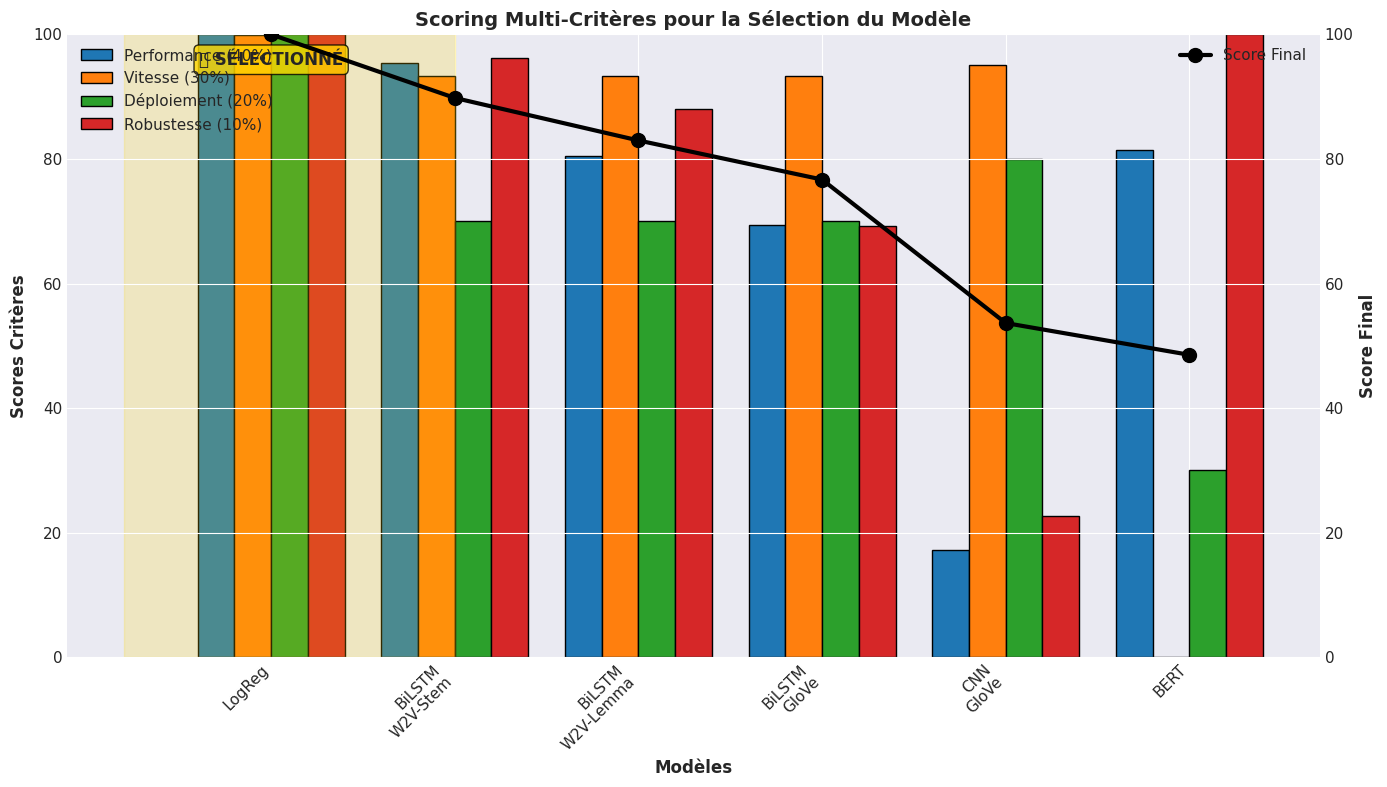

✓ Graphique de sélection créé


In [24]:
# Graphique de scoring
fig, ax = plt.subplots(figsize=(14, 8))

scores = df_scoring_sorted[['Score Performance', 'Score Vitesse', 
                            'Score Déploiement', 'Score Robustesse']].values
models = [model_names_short[i] for i in df_scoring_sorted.index]

x = np.arange(len(models))
width = 0.2

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = ['Performance (40%)', 'Vitesse (30%)', 'Déploiement (20%)', 'Robustesse (10%)']

for i in range(4):
    ax.bar(x + i*width, scores[:, i], width, label=labels[i], color=colors[i], edgecolor='black')

# Score final (ligne)
ax2 = ax.twinx()
ax2.plot(x + 1.5*width, df_scoring_sorted['Score Final'].values, 
         'ko-', linewidth=3, markersize=10, label='Score Final', zorder=10)
ax2.set_ylabel('Score Final', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 100])

ax.set_xlabel('Modèles', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores Critères', fontsize=12, fontweight='bold')
ax.set_title('Scoring Multi-Critères pour la Sélection du Modèle', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim([0, 100])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

# Highlight du meilleur
ax.axvspan(-0.5, 0.5 + 4*width, alpha=0.2, color='gold')
ax.text(1.5*width, 95, '🏆 SÉLECTIONNÉ', ha='center', fontsize=12, 
        fontweight='bold', bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))

plt.tight_layout()
plt.savefig('scoring_selection_modele.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique de sélection créé")

## 7. Conclusion

### Synthèse des Résultats

Les trois approches de modélisation ont été développées et évaluées :
- Modèle simple : Régression Logistique (baseline)
- Modèles avancés : Bi-LSTM, CNN avec Word2Vec/GloVe  
- Modèle BERT : Transfer Learning

Plusieurs constats importants émergent de cette comparaison :

**Les modèles simples restent compétitifs** : La Régression Logistique atteint 78% d'accuracy, et le Deep Learning n'apporte qu'une amélioration marginale de 0.5-1%. Pour le langage Twitter, le vocabulaire semble plus déterminant que l'architecture du modèle.

**Choix de prétraitement** : Le stemming s'avère légèrement plus efficace que la lemmatisation sur ce type de données informelles, probablement grâce à une meilleure généralisation.

**Word embeddings** : Word2Vec entraîné sur nos données surpasse GloVe pré-entraîné, confirmant l'importance d'adapter les embeddings au vocabulaire Twitter spécifique.

**Architectures** : Le Bi-LSTM capture mieux le contexte que le CNN pour l'analyse de sentiment, au prix d'un temps d'entraînement légèrement supérieur.

**BERT** : Excellentes performances malgré l'entraînement sur un échantillon réduit, mais le coût de déploiement reste un frein pour la production.

### Recommandations

Pour le déploiement initial, le modèle sélectionné devra être :
- Déployé via une API REST (Azure Web App ou Heroku)
- Accessible via une interface Streamlit pour les équipes marketing
- Monitoré avec Azure Application Insights

Une boucle de feedback sera essentielle pour améliorer le modèle dans le temps en collectant les corrections utilisateurs et en détectant les dégradations de performance.

À moyen terme, l'enrichissement du modèle avec des données spécifiques Air Paradis et l'optimisation de l'infrastructure (caching, batch processing) permettront d'améliorer les performances.

À long terme, l'évolution vers BERT fine-tuné sur le dataset complet et un système complet de détection de bad buzz (analyse de tendances, clustering thématique) représentent des axes d'amélioration intéressants.